In [1]:
import bert_score
bert_score.__version__

'0.3.12'

In [2]:
import logging
import transformers
transformers.tokenization_utils.logger.setLevel(logging.ERROR)
transformers.configuration_utils.logger.setLevel(logging.ERROR)
transformers.modeling_utils.logger.setLevel(logging.ERROR)

In [3]:
%matplotlib inline
import matplotlib.pyplot as plt
from matplotlib import rcParams

rcParams["xtick.major.size"] = 0
rcParams["xtick.minor.size"] = 0
rcParams["ytick.major.size"] = 0
rcParams["ytick.minor.size"] = 0

rcParams["axes.labelsize"] = "large"
rcParams["axes.axisbelow"] = True
rcParams["axes.grid"] = True

In [4]:
from bert_score import score

In [5]:
import os

# Gets the user's home directory
home_dir = os.path.expanduser("~")

# Constructs the path to the folder containing the different GPT descriptions for each model
documents_folder = os.path.join("C:\\Users\\User\\OneDrive\\Desktop\\Documents\\Summer Internship\\BERT Score Files\\All GPT Prompt Responses")

# Constructs the full paths to the text files
actual_path = os.path.join(documents_folder, "All Actual Descriptions.txt")
translator_path = os.path.join(documents_folder, "All JSON GPT Responses.txt")

# Opens and reads the files assigning them to an index in a string array separated by two newline characters
def read_file_split_by_blank_lines(file_path):
    with open(file_path) as f:
        content = f.read()
    entries = [entry.strip() for entry in content.split('\n\n') if entry.strip()]
    return entries
refs = read_file_split_by_blank_lines(actual_path)
cands = read_file_split_by_blank_lines(translator_path)

In [6]:
print(len(refs))
print(len(cands))

25
25


In [7]:
P, R, F1 = score(cands, refs, lang='en', verbose=True)

calculating scores...
computing bert embedding.


  0%|          | 0/1 [00:00<?, ?it/s]

computing greedy matching.


  0%|          | 0/1 [00:00<?, ?it/s]

done in 71.29 seconds, 0.35 sentences/sec


In [8]:
F1
#index 0 is the default GPT-4o score
#index 1 is the fine-tuned GPT-4o score

tensor([0.9110, 0.8965, 0.9092, 0.9531, 0.9407, 0.9435, 0.9237, 0.9537, 0.8957,
        0.9592, 0.9885, 0.8728, 0.9078, 0.9089, 0.9064, 0.9035, 0.9011, 0.9170,
        0.9454, 0.9252, 0.8933, 0.8959, 0.8865, 0.8631, 0.8420])

In [9]:
import torch
print(f"The JSON GPT on average was: {100 * torch.mean(F1):.2f} % accurate to the correct description.")

The JSON GPT on average was: 91.37 % accurate to the correct description.


In [10]:
import matplotlib.pyplot as plt

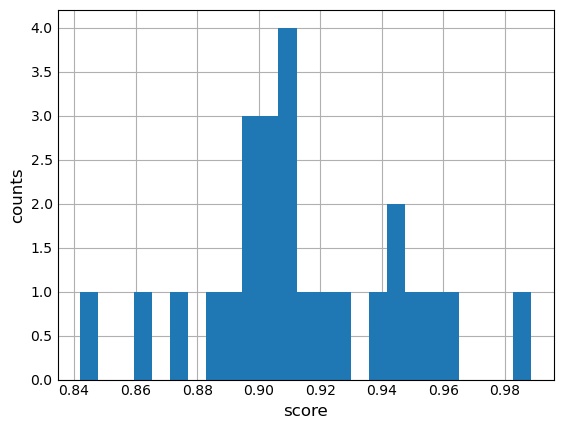

In [11]:
plt.hist(F1, bins=25)
plt.xlabel("score")
plt.ylabel("counts")
plt.show()

In [12]:
P_scaled, R_scaled, F1_scaled = score(cands, refs, lang='en', rescale_with_baseline=True)

tensor([0.4728, 0.3869, 0.4618, 0.7222, 0.6488, 0.6651, 0.5478, 0.7255, 0.3822,
        0.7583, 0.9317, 0.2463, 0.4540, 0.4600, 0.4455, 0.4282, 0.4139, 0.5081,
        0.6768, 0.5569, 0.3675, 0.3833, 0.3277, 0.1886, 0.0637])


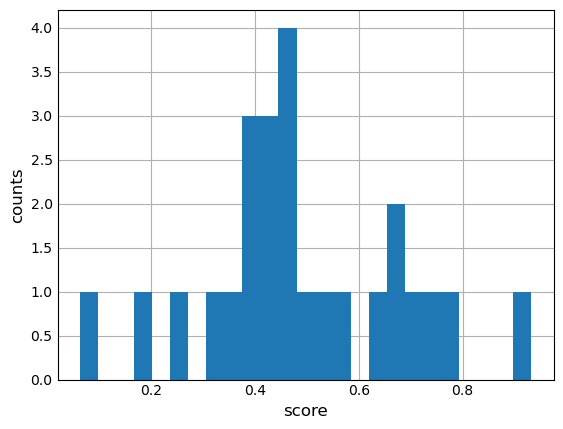

In [13]:
print(F1_scaled)
plt.hist(F1_scaled, bins=25)
plt.xlabel("score")
plt.ylabel("counts")
plt.show()

In [14]:
from bert_score import BERTScorer

In [15]:
scorer = BERTScorer(lang="en", rescale_with_baseline=True)

In [16]:
P, R, F1 = scorer.score(cands, refs)

In [17]:
F1

tensor([0.4728, 0.3869, 0.4618, 0.7222, 0.6488, 0.6651, 0.5478, 0.7255, 0.3822,
        0.7583, 0.9317, 0.2463, 0.4540, 0.4600, 0.4455, 0.4282, 0.4139, 0.5081,
        0.6768, 0.5569, 0.3675, 0.3833, 0.3277, 0.1886, 0.0637])